Importing all necessary libraries

In [39]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from os import path
import nltk

# The Data
Reading the Data

In [40]:
scripts = pd.read_csv('/Users/neniscamaria/Documents/Master/Semestru 2/Natural Language Processing/Practical Project/RickAndMortyScripts.csv')
scripts.head()

,index,season no.,episode no.,episode name,name,line
0,0,1,1,Pilot,Rick,Morty! You gotta come on. Jus' ... you gotta c...
1,1,1,1,Pilot,Morty,"What, Rick? What's going on?"
2,2,1,1,Pilot,Rick,"I got a surprise for you, Morty."
3,3,1,1,Pilot,Morty,It's the middle of the night. What are you tal...
4,4,1,1,Pilot,Rick,"Come on, I got a surprise for you. Come on, h..."


Reading the lexicons

In [41]:
bing = pd.read_csv('/Users/neniscamaria/Documents/Master/Semestru 2/Natural Language Processing/Practical Project/Bing.csv')
nrc = pd.read_csv('/Users/neniscamaria/Documents/Master/Semestru 2/Natural Language Processing/Practical Project/Nrc.csv')

Renaming the columns for the scripts dataset

In [42]:
scripts.rename(columns = {'index':'Index', 'season no.':'Season.No', 'episode no.':'Episode.No', 'episode name':'Episode.Name', 'name': 'Character.Name', 'line':'Dialog'}, inplace = True)

In [43]:
scripts.head()

,Index,Season.No,Episode.No,Episode.Name,Character.Name,Dialog
0,0,1,1,Pilot,Rick,Morty! You gotta come on. Jus' ... you gotta c...
1,1,1,1,Pilot,Morty,"What, Rick? What's going on?"
2,2,1,1,Pilot,Rick,"I got a surprise for you, Morty."
3,3,1,1,Pilot,Morty,It's the middle of the night. What are you tal...
4,4,1,1,Pilot,Rick,"Come on, I got a surprise for you. Come on, h..."


# Text mining
## Cleaning the corpus function
This predefined function is going to clean the text from:

- the punctuation 
- extra white space

- transforms to lower case

- stopwords (common words that should be ignored)

- numbers

`OBS: Need to preprocess the text a bit, i.e. replace gonna->gon-na and gotta->got-ta. These two words are very frequent in the script and the nltk tokenizer splits them as follows: gonna-> gon na, gotta-> got ta. We do not wish to have this behavior, so you replace these two world after the punctuation is removed`

In [44]:
def clean_corpus(text):
    text = text.translate(str.maketrans('','', string.punctuation))
    text = text.strip().lower()
    text = ''.join([i for i in text if not i.isdigit()])
    text = text.replace("gonna", 'gon-na')
    text = text.replace('gotta', 'got-ta')
    
    more_stopwords = ["thats","weve","hes","theres","ive","im",
                     "will","can","cant","dont","youve","us",
                    "youre","youll","theyre","whats","didnt"]
    
    all_stopwords = list(stopwords.words('english'))
    all_stopwords.append(more_stopwords)
    
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]
    
    filtered_text = (" ").join(tokens_without_sw)
    return filtered_text


## Unigrams | Bigrams | Trigrams
The following predefined functions will process the text depending on the case:

- Unigrams take only 1 word at a time
- Bigrams take 2 sequential words at a time
- Trigrams take 3 sequential words at a time
Eg. text: "come on morty"

- Unigram: "come", "on", "morty"
- Bigram: "come on", "on morty"
- Trigram: "come on morty"

### Unigram:

In [45]:
def frequentTerms(text):
    token = nltk.word_tokenize(text)
    unigrams = ngrams(token, 1)
    return Counter(unigrams)
    

### Bigram:

In [46]:
def frequentBigrams(text):
    token = nltk.word_tokenize(text)
    unigrams = ngrams(token, 2)
    return Counter(unigrams)


### Trigram:

In [47]:
def frequentTrigrams(text):
    token = nltk.word_tokenize(text)
    unigrams = ngrams(token, 3)
    return Counter(unigrams)

# Dialogues: Who talks the most?

<AxesSubplot:>

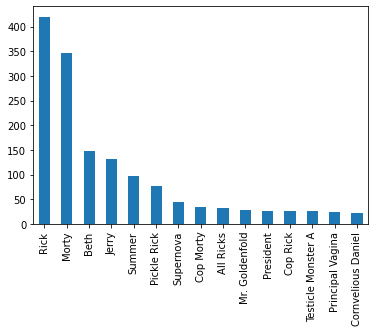

In [48]:
scripts['Character.Name'].value_counts().head(15).plot.bar()

# Bing Lexicon + -

The bing lexicon categorizes the words into positives and negatives.

## Word clouds

First, we will generate a word cloud on the entire script.

In [49]:
def get_script_text():
    script_text = ''
    for line in scripts['Dialog']:
        script_text+=" " + (line)
    return script_text

script_text=get_script_text()

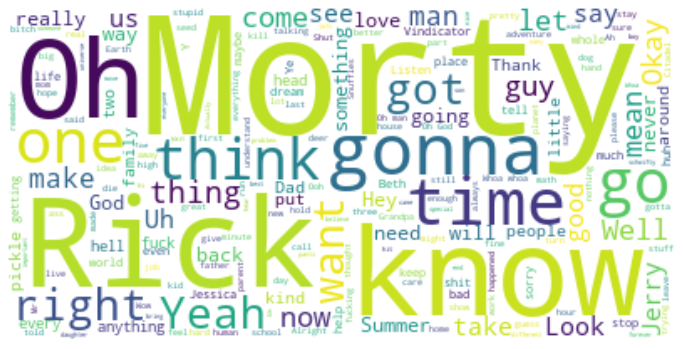

In [50]:
import matplotlib.pyplot as plt
    
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(script_text)
plt.figure(figsize=[12, 14])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

We need to obtain a DataFrame with words, their sentiment, and their frequency in the script.
To do this, we first need to tokenize the whole script, then calculate the frequency of each word.
After this, we can obtain the sentiment from the bing lexicon


The below function will help us in our further analysis as well. It takes as parameter a string containing all the words we want to analysis and the lexicon we want to use. It returns a data frame containing 3 columns: word, sentiment, and frequency.

In [51]:
def get_sentiment_dataframe(script_text, lexicon = 'bing'):
    # tokenize the dialogues
    tokens = word_tokenize(script_text)

    #initialize data frame
    columns = {'word': [], 'sentiment': [], 'frequency': []}
    sentiment_df = pd.DataFrame(data=columns)

    # get frequency dict
    x = np.array(tokens)
    unique, counts = np.unique(x, return_counts=True)
    dict_freq = {}
    for i in range(len(unique)):
        dict_freq[unique[i]] = counts[i]
    dict_freq

    if lexicon == 'bing':
        lexicon_df = bing 
    else:
        lexicon_df =  nrc;
    # populating the data frme
    for token in dict_freq.keys():
        polarity = lexicon_df[lexicon_df['word'] == token]['sentiment'].values
        if len(polarity):
            dict = {'word': token, 'sentiment': polarity[0], 'frequency': dict_freq[token]}
            sentiment_df = sentiment_df.append(dict, ignore_index = True)
    return sentiment_df
        

In [52]:
sentiment_df = get_sentiment_dataframe(script_text)
sentiment_df.head()

,word,sentiment,frequency
0,accomplish,positive,2.0
1,accomplished,positive,1.0
2,admire,positive,2.0
3,advanced,positive,2.0
4,afford,positive,1.0


Now that we have the data frame populated with all the info we need, we can create word cloud for positive and negative words

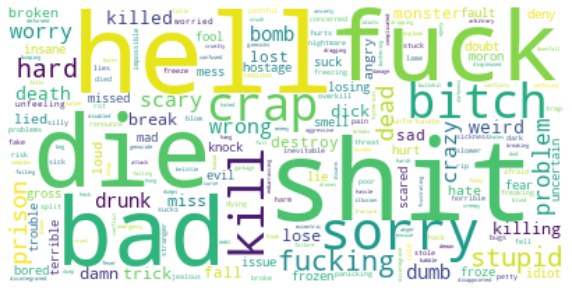

In [53]:
# word cloud for negative words
negative_df = sentiment_df[sentiment_df['sentiment'] == 'negative'] 
 
d = {}
for index, row in negative_df.iterrows():
    word = row['word']
    freq = row['frequency']
    d[word] = freq
    
wordcloud = WordCloud(max_font_size=80, background_color="white", collocations=False).generate_from_frequencies(d)
plt.figure(figsize=[10, 12])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

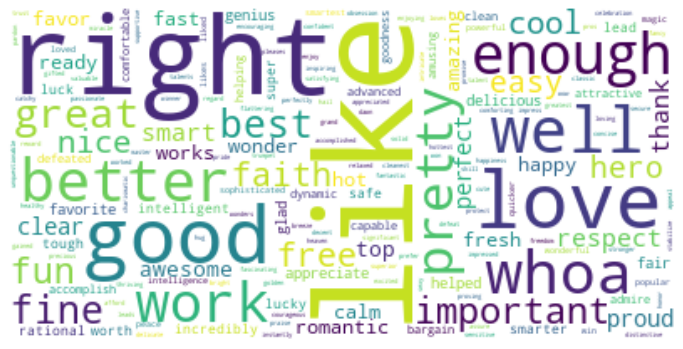

In [54]:
# word cloud for positive words
negative_df = sentiment_df[sentiment_df['sentiment'] == 'positive'] 
 
d = {}
for index, row in negative_df.iterrows():
    word = row['word']
    freq = row['frequency']
    d[word] = freq
    
wordcloud = WordCloud(max_font_size=80, background_color="white", collocations=False).generate_from_frequencies(d)
plt.figure(figsize=[12, 14])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Overall mood of each member of the Smith family
To determine the overall mood for each family member, we need to first get all the lines of each character, and then perform the above analysis.

The belowe function computes a sentiment frequency dictionary based on the sentiment data frame calculated for the character with name `name`. The returned dictionary will contain the name of the character, the number of positive word it said, and the number of negative words it said.

`NOTE: the words that are counted are inoy those that were found in the Bing lexicon. Therefore, the frequencies combined will most probably not coincide with the total number of words said by a character`

In [55]:
def get_sentiment_freq_for_character(name):
    character_lines = scripts[scripts['Character.Name'] == name]['Dialog'].values
    text = ''.join(clean_corpus(line) for line in character_lines)
    
    sentiment_df = get_sentiment_dataframe(text)
    
    sentiment_frequency={}
    negative = sentiment_df[sentiment_df['sentiment'] == 'negative']
    neg_freq = negative['frequency'].sum()
    
    positive = sentiment_df[sentiment_df['sentiment'] == 'positive']
    pos_freq = positive['frequency'].sum()
    
    
    return {'name': name, 'positive': pos_freq, 'negative': neg_freq}

Here, we compute the sentiment frequency data frame for the entire Smith family.

In [56]:
smith_family = ["Rick", "Morty", "Beth", "Jerry", "Summer"]

frequency_df = pd.DataFrame(data={"name": [], "positive": [], "negative": []})

for member in smith_family:
    frequency = get_sentiment_freq_for_character(member)
    frequency_df = frequency_df.append(frequency, ignore_index=True)

Plotting the resulting data frame.

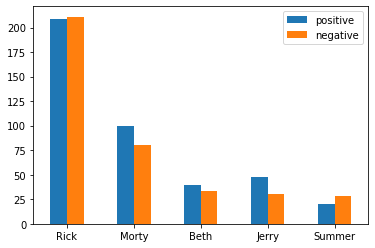

In [57]:
pos = frequency_df['positive'].values.tolist()
neg = frequency_df['negative'].values.tolist()
names = frequency_df['name'].values.tolist()
df = pd.DataFrame({'positive': pos, 'negative': neg}, index=names)
ax = df.plot.bar(rot=0)

Generating the chord chart in a html file.

In [58]:
names=frequency_df.columns.values.tolist()
frequency_df["positive"] = frequency_df["positive"].astype(int)
frequency_df["negative"] = frequency_df["negative"].astype(int)
values = frequency_df.values.tolist()

# issues with chord
#Chord(values, names).to_html("../smithFamilyRelationship.html")

# NRC Lexicon
The nrc lexicon cathegorizes the words in 10 moods:
- positive
- negative
- anger
- anticipation
- disgust
- fear
- joy
- sadness
- surprise
- trust

Let us first discover what the overall mood in the TV series is.

First, we need to get the tokens mapped to their emotion, then get the frequency of each emotion and plot it.

In [59]:
nrc_sentiment_df = get_sentiment_dataframe(script_text, 'nrc')
emotions = nrc_sentiment_df['sentiment'].unique()

d={}
for emotion in emotions:
    rows = nrc_sentiment_df[nrc_sentiment_df['sentiment'] == emotion]
    overall_frequency = rows['frequency'].sum()
    d[emotion]= overall_frequency

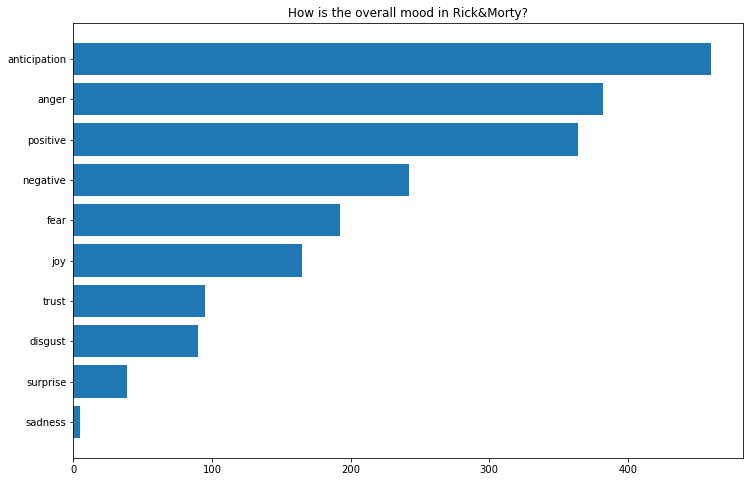

In [60]:
# plotting the frequency of emotions in decreasing order
plt_1 = plt.figure(figsize=(12, 8))

sorted_values = sorted(d.items(), key=lambda x: x[1])
x = [a[0] for a in sorted_values]
y = [a[1] for a in sorted_values]
plt.barh(x, y)
plt.title("How is the overall mood in Rick&Morty?")
plt.show()

## Sentiment split by most frequent words

In [61]:
def plot_emotion_to_words(df):
    plt_1 = plt.figure()
    x = df['word'].values.tolist()
    y = df['frequency'].values.tolist()
    plt.barh(x, y)
    plt.title(df['sentiment'].values[0])
    plt.show()


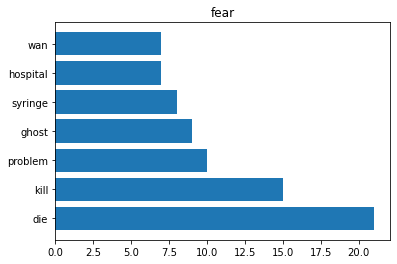

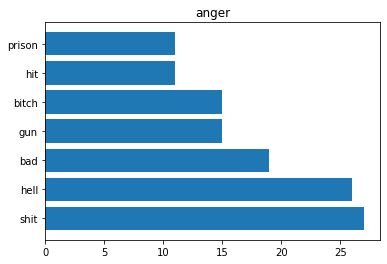

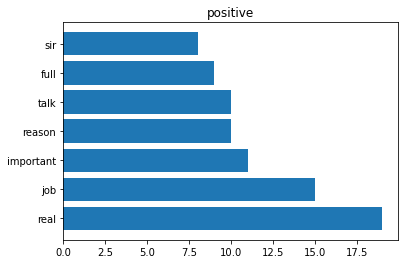

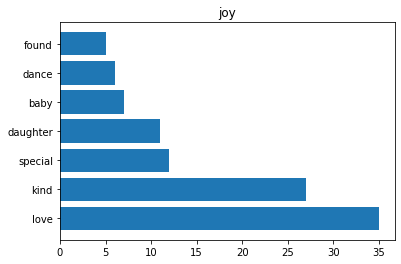

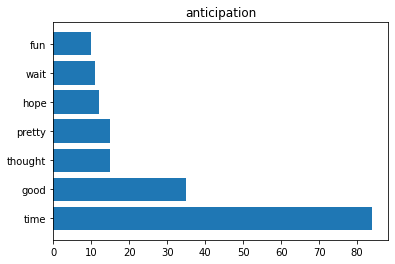

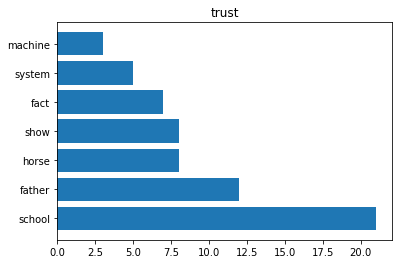

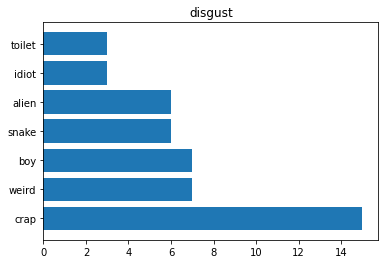

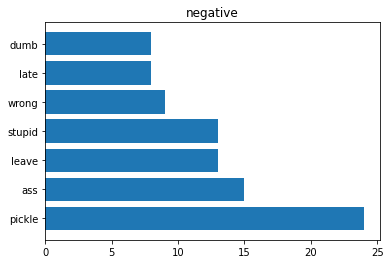

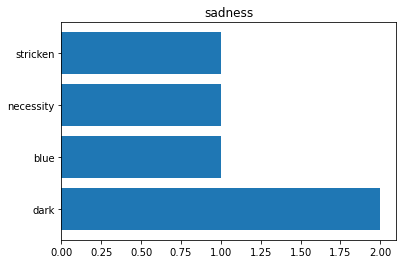

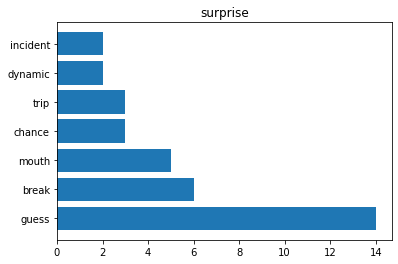

In [62]:

for emotion in emotions:
    rows = nrc_sentiment_df[nrc_sentiment_df['sentiment'] == emotion]
    sort_by_freq = rows.sort_values(by=['frequency'], ascending=False)
    plot_emotion_to_words(sort_by_freq.head(7))


## Radar Chart : Moods by Smith Family Members

In [63]:
def get_emotion_freq_for_character(name):
    character_lines = scripts[scripts['Character.Name'] == name]['Dialog'].values
    text = ''.join(clean_corpus(line) for line in character_lines)
    emotion_df = get_sentiment_dataframe(text, 'nrc')
    
    emotion_frequency={}
    for emotion in emotions:
        frequency = emotion_df[emotion_df['sentiment'] == emotion]['frequency'].sum()
        emotion_frequency[emotion] = frequency
        
    return emotion_frequency
    

In [64]:
members_emotion_frequency = {}

for member in smith_family:
    emotion_freq = get_emotion_freq_for_character(member)
    members_emotion_frequency[member] = emotion_freq

Now we can plot the data.
We plot a radial chart that has the relative emotions depicted by each character.
By relative, we mean the percentage of the overall emotion that was felt by the specific character and expressed in their lines of dialogue.

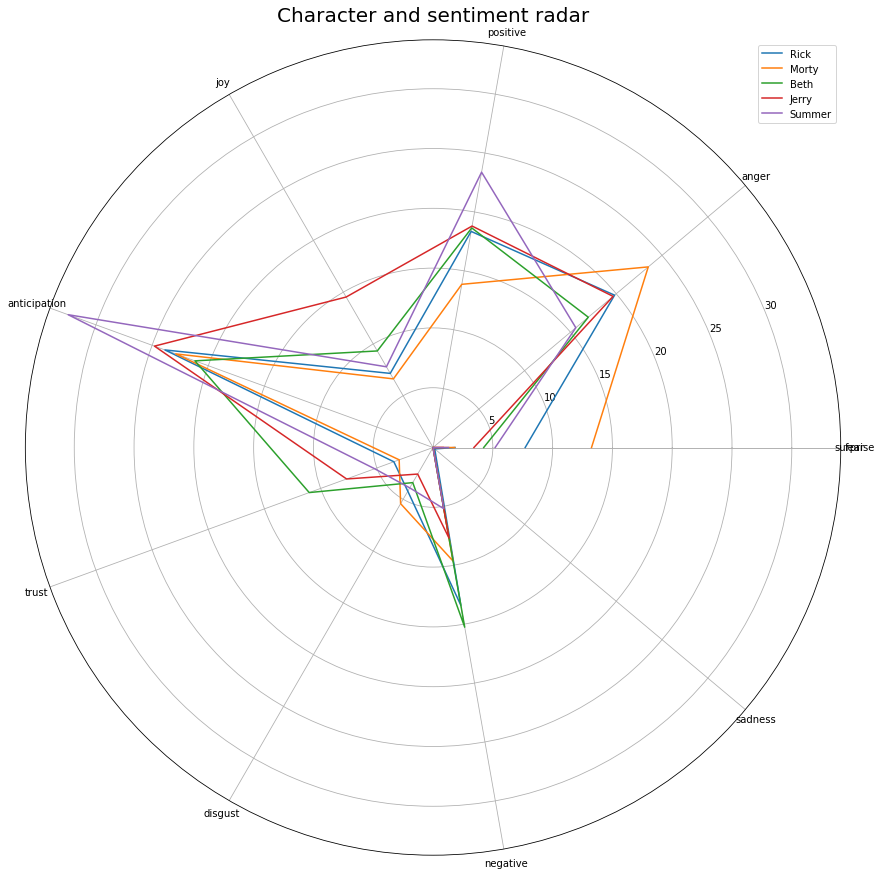

In [65]:
categories = emotions

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(emotions))

plt.figure(figsize=(15, 15))
plt.subplot(polar=True)

# before plotting, we need to normalize the values
for member in smith_family:
    values = []
    member_emotion_count = members_emotion_frequency[member]
    total = sum(list(member_emotion_count.values()))
    for emotion in emotions:
        values.append(member_emotion_count[emotion]/total * 100)
    
    plt.plot(label_loc, values, label=member)
    
plt.title('Character and sentiment radar', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

## Moods per family member
Here, we will vizualize the emotions expressed by each family member and their frequency in the script.

In [66]:
def plot_emotion_to_member(df):
    plt_1 = plt.figure()
    x = df['word'].values.tolist()
    y = df['frequency'].values.tolist()
    plt.barh(x, y)
    plt.title(df['sentiment'].values[0])
    plt.show()

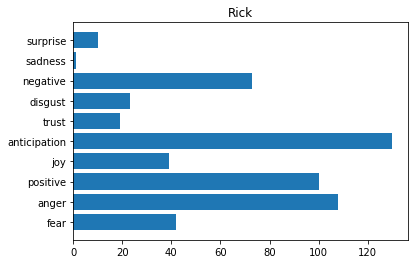

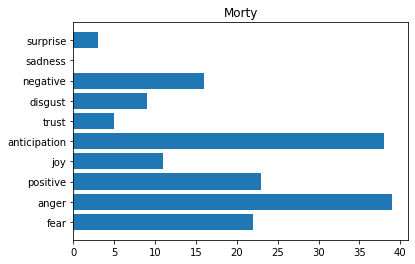

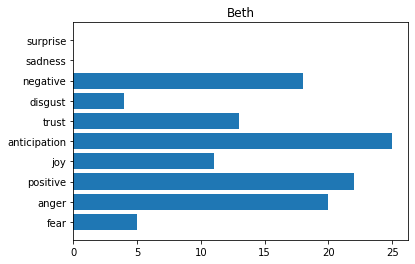

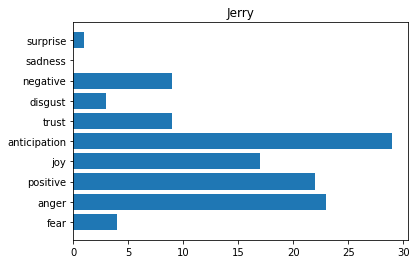

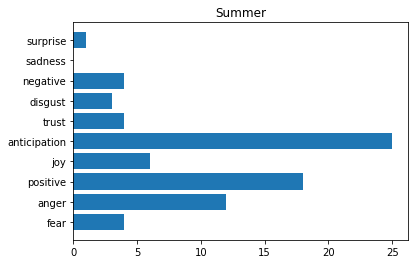

In [67]:
members_emotion_frequency

for member in members_emotion_frequency.keys():
    emotions_freq = members_emotion_frequency[member]
    plt_1 = plt.figure()
    x = emotions
    y = emotions_freq.values()
    plt.barh(x, y)
    plt.title(member)
    plt.show()
    
    

# Unigram: Most Frequent words per Smith Family Character

In [68]:
def get_unigrams_for_character(name):
    character_lines = scripts[scripts['Character.Name'] == name]['Dialog'].values
    text = ''.join(clean_corpus(line) for line in character_lines)
    return frequentTerms(text).most_common(10)

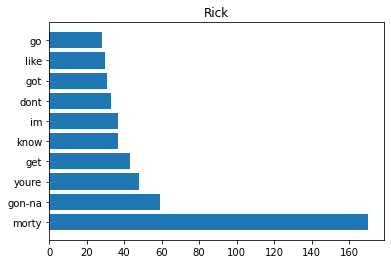

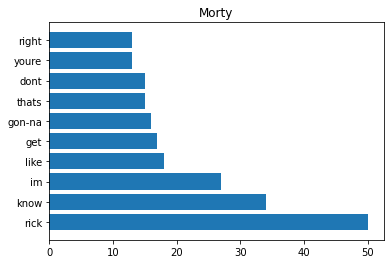

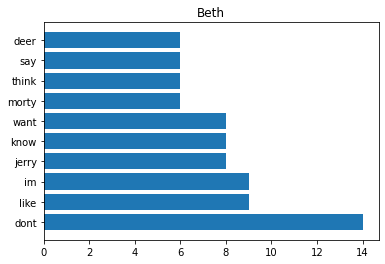

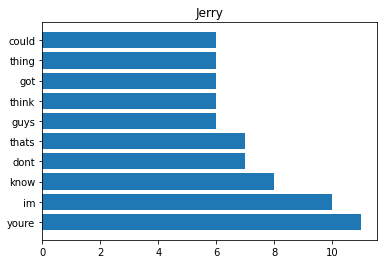

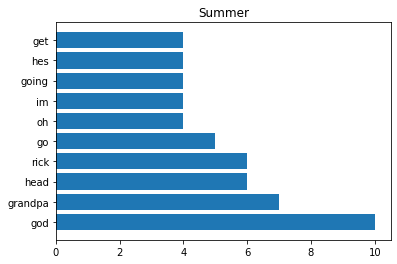

In [69]:
for member in smith_family:
    unigram = get_unigrams_for_character(member)
    plt_1 = plt.figure()
    x = [x[0][0] for x in unigram]
    y = [x[1] for x in unigram]
    plt.barh(x, y)
    plt.title(member)
    plt.show()

# The Bigram and Trigram : most frequent combinations per family member

In [70]:
def get_bigrams_for_character(name):
    character_lines = scripts[scripts['Character.Name'] == name]['Dialog'].values
    text = ''.join(clean_corpus(line) for line in character_lines)
    return frequentBigrams(text).most_common(10)

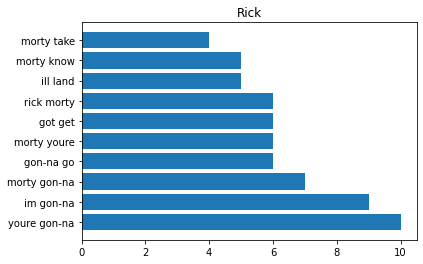

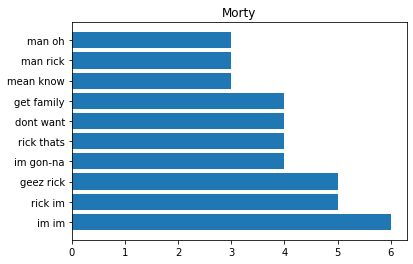

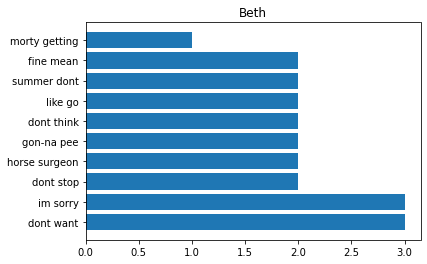

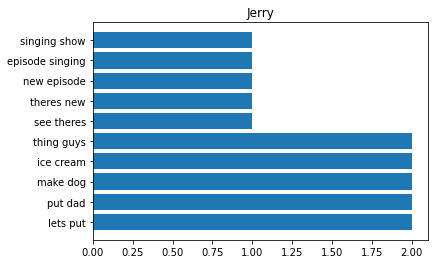

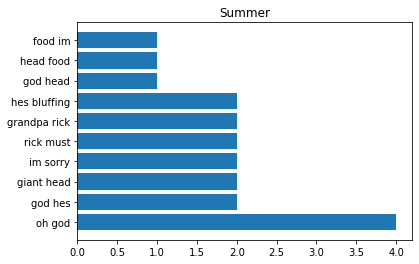

In [71]:

for member in smith_family:
    unigram = get_bigrams_for_character(member)
    plt_1 = plt.figure()
    x = [" ".join(x[0])for x in unigram]
    y = [x[1] for x in unigram]
    plt.barh(x, y)
    plt.title(member)
    plt.show()

In [72]:
def get_trigrams_for_character(name):
    character_lines = scripts[scripts['Character.Name'] == name]['Dialog'].values
    text = ''.join(clean_corpus(line) for line in character_lines)
    return frequentTrigrams(text).most_common(10)

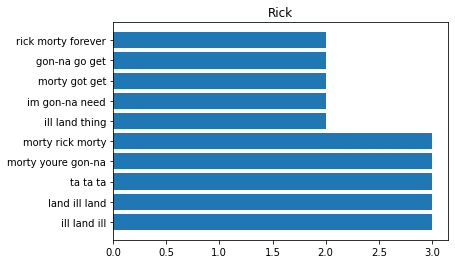

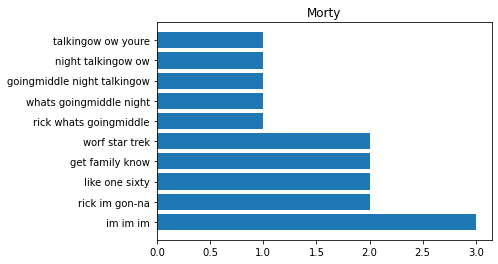

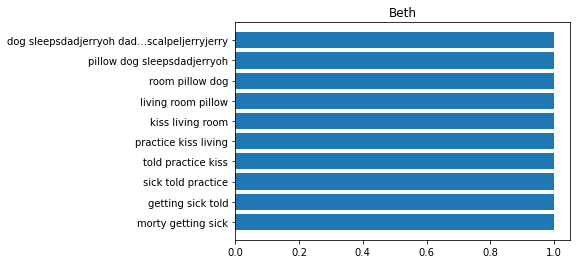

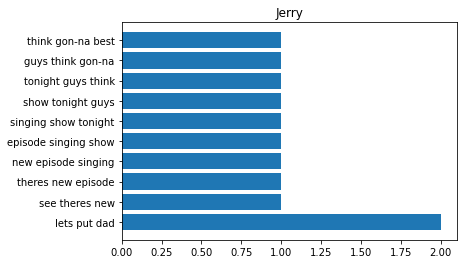

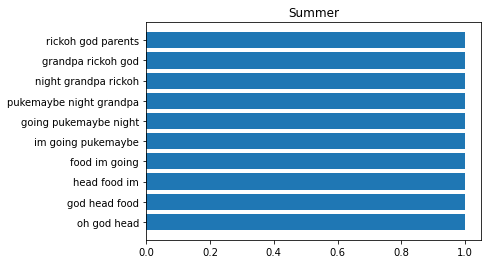

In [73]:
for member in smith_family:
    unigram = get_trigrams_for_character(member)
    plt_1 = plt.figure()
    x = [" ".join(x[0])for x in unigram]
    y = [x[1] for x in unigram]
    plt.barh(x, y)
    plt.title(member)
    plt.show()

# The Bigram and Trigram : most frequent combinations in the script

In [74]:
script_text_cleaned = ''
for line in scripts['Dialog']:
    script_text_cleaned+=" " + clean_corpus(line)

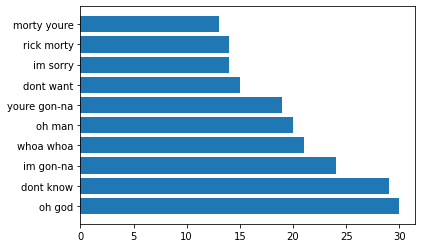

In [75]:
unigram = frequentBigrams(script_text_cleaned).most_common(10)
plt_1 = plt.figure()
x = [" ".join(x[0])for x in unigram]
y = [x[1] for x in unigram]
plt.barh(x, y)
plt.title("")
plt.show()

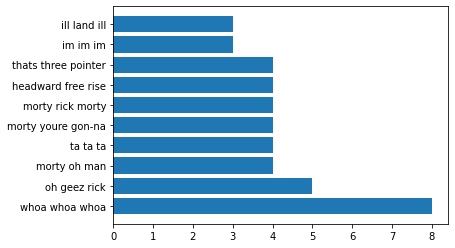

In [76]:
unigram = frequentTrigrams(script_text_cleaned).most_common(10)
plt_1 = plt.figure()
x = [" ".join(x[0])for x in unigram]
y = [x[1] for x in unigram]
plt.barh(x, y)
plt.title("")
plt.show()